In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv(r"C:\Users\ok\Downloads\smsspamcollection\spam_ham_dataset.csv",encoding='latin1', header=None)

In [57]:
data.columns  = ["output", "message"]

In [58]:
data.head()

,output,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
data["output"].value_counts()

ham     4825
spam     747
Name: output, dtype: int64

In [60]:
data.describe()

,output,message
count,5572,5572
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4825,30


In [61]:
data["length_sms"] = data["message"].apply(len)

In [62]:
data.head(2)

,output,message,length_sms
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


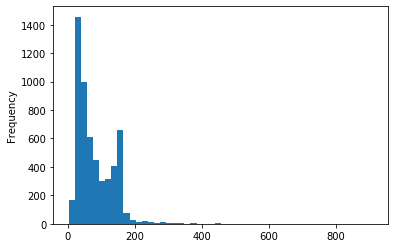

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
data['length_sms'].plot(bins=50, kind='hist')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B4BCAE708>,
      dtype=object)

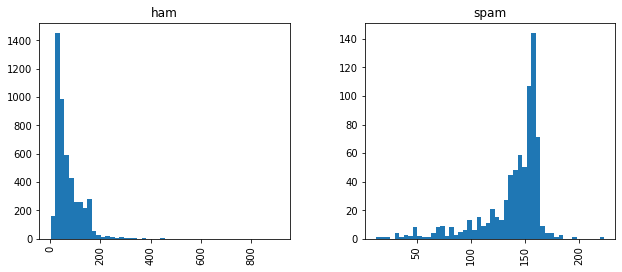

In [64]:
data.hist(column='length_sms', by='output', bins=50,figsize=(10,4))

In [65]:
data["output"] = data["output"].map({"ham":1, "spam":0}) 

In [66]:
data.head(2)

,output,message,length_sms
0,1,"Go until jurong point, crazy.. Available only ...",111
1,1,Ok lar... Joking wif u oni...,29


In [67]:
data["output"].value_counts()

1    4825
0     747
Name: output, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['message'], 
                                                    data['output'],test_size=0.20, 
                                                    random_state=1,stratify = data["output"])

In [69]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (4457,)
X_test shape (1115,)
y_train shape (4457,)
y_test shape (1115,)


In [70]:
y_train.value_counts()

1    3859
0     598
Name: output, dtype: int64

In [71]:
y_test.value_counts()

1    966
0    149
Name: output, dtype: int64

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [81]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [82]:
predictions = naive_bayes.predict(testing_data)

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))

Accuracy score: 0.989237668161435
Precision score: 0.9907407407407407
Recall score: 0.9968944099378882
F1 score: 0.9938080495356038
